                    520
Returns        0.043575
Volatility     0.030879
Sharpe Ratio   1.411136
1101-1 Weight  0.261657
1102-1 Weight  0.022033
1216-1 Weight  0.468458
1301-1 Weight  0.161220
1303-1 Weight  0.086631
                   3036
Returns        0.053655
Volatility     0.033368
Sharpe Ratio   1.608007
1101-1 Weight  0.027944
1102-1 Weight  0.239398
1216-1 Weight  0.423366
1301-1 Weight  0.298023
1303-1 Weight  0.011269


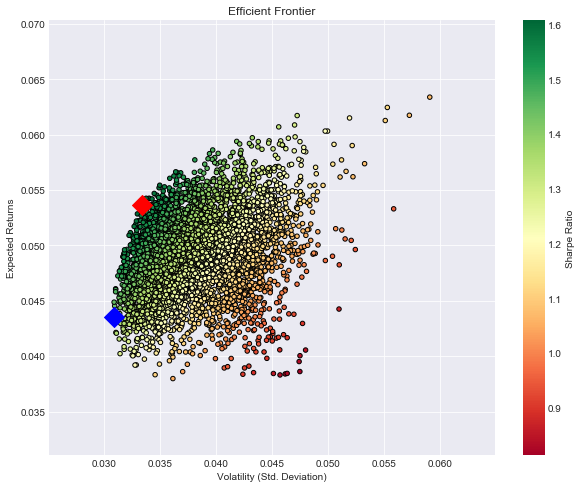

                   2571
Returns       -0.001990
Volatility     0.071839
Sharpe Ratio  -0.027699
1101-2 Weight  0.023202
1102-2 Weight  0.126639
1216-2 Weight  0.080546
1301-2 Weight  0.046216
1303-2 Weight  0.723397
                   1963
Returns        0.006931
Volatility     0.078495
Sharpe Ratio   0.088300
1101-2 Weight  0.002831
1102-2 Weight  0.002371
1216-2 Weight  0.074441
1301-2 Weight  0.571594
1303-2 Weight  0.348762


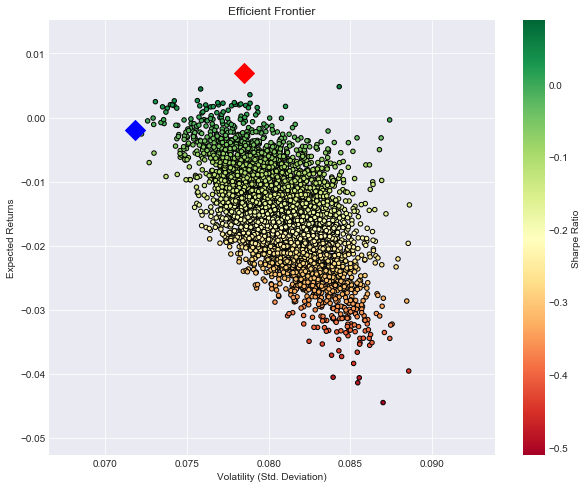

                   3983
Returns        0.008531
Volatility     0.031793
Sharpe Ratio   0.268326
1101-3 Weight  0.301112
1102-3 Weight  0.008834
1216-3 Weight  0.236496
1301-3 Weight  0.197998
1303-3 Weight  0.255559
                   2619
Returns        0.026320
Volatility     0.036099
Sharpe Ratio   0.729112
1101-3 Weight  0.023589
1102-3 Weight  0.122208
1216-3 Weight  0.034626
1301-3 Weight  0.209704
1303-3 Weight  0.609873


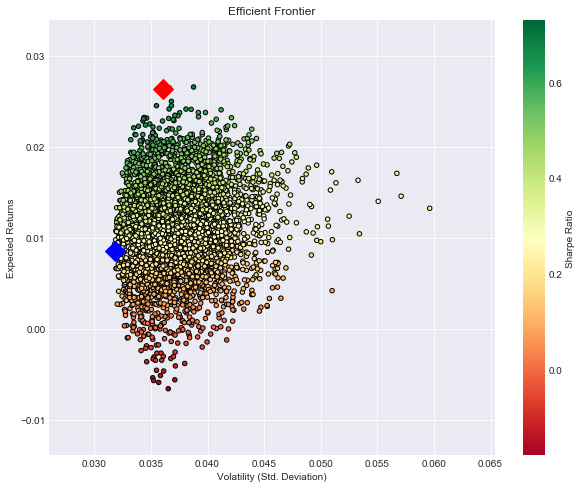

                   4365
Returns        0.058052
Volatility     0.034101
Sharpe Ratio   1.702375
1101-4 Weight  0.347090
1102-4 Weight  0.070232
1216-4 Weight  0.001057
1301-4 Weight  0.444839
1303-4 Weight  0.136782
                   1751
Returns        0.102267
Volatility     0.044994
Sharpe Ratio   2.272879
1101-4 Weight  0.477865
1102-4 Weight  0.409413
1216-4 Weight  0.001900
1301-4 Weight  0.068743
1303-4 Weight  0.042080


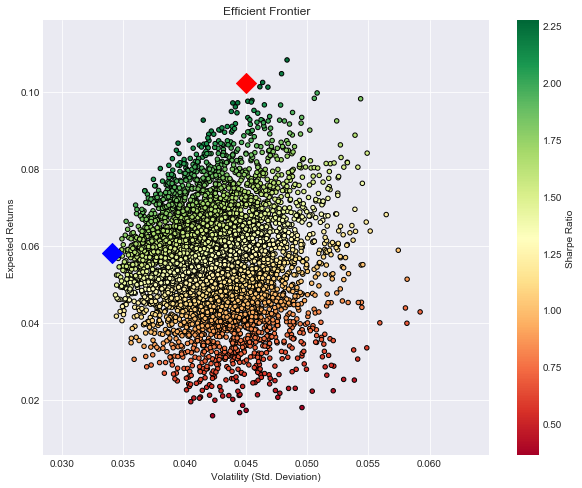

                   3427
Returns        0.023265
Volatility     0.040597
Sharpe Ratio   0.573080
1101-5 Weight  0.007526
1102-5 Weight  0.018389
1216-5 Weight  0.363234
1301-5 Weight  0.079316
1303-5 Weight  0.531536
                   1863
Returns        0.055527
Volatility     0.069564
Sharpe Ratio   0.798214
1101-5 Weight  0.484881
1102-5 Weight  0.021845
1216-5 Weight  0.470416
1301-5 Weight  0.020699
1303-5 Weight  0.002160


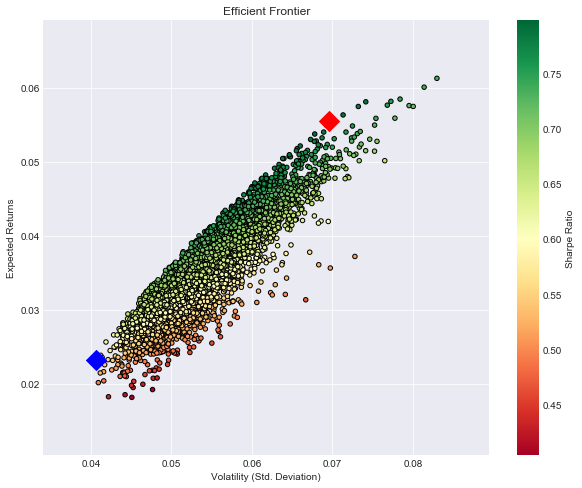

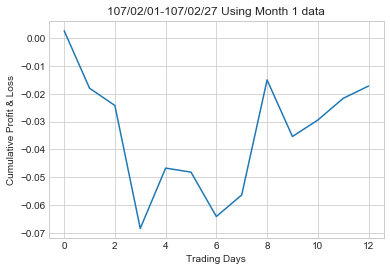

                   3036
1101-1 Weight  0.027944
1102-1 Weight  0.239398
1216-1 Weight  0.423366
1301-1 Weight  0.298023
1303-1 Weight  0.011269
                           0
Return Before Fees -0.019793
Return After Fees  -0.025793
SD                  0.021255


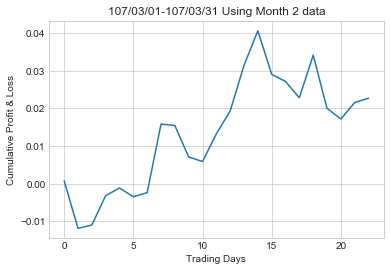

                   1963
1101-2 Weight  0.002831
1102-2 Weight  0.002371
1216-2 Weight  0.074441
1301-2 Weight  0.571594
1303-2 Weight  0.348762
                           0
Return Before Fees  0.021916
Return After Fees   0.015916
SD                  0.014723


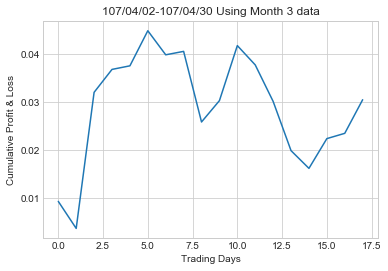

                   2619
1101-3 Weight  0.023589
1102-3 Weight  0.122208
1216-3 Weight  0.034626
1301-3 Weight  0.209704
1303-3 Weight  0.609873
                          0
Return Before Fees  0.02128
Return After Fees   0.01528
SD                  0.01156


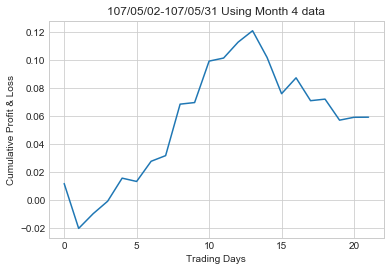

                   1751
1101-4 Weight  0.477865
1102-4 Weight  0.409413
1216-4 Weight  0.001900
1301-4 Weight  0.068743
1303-4 Weight  0.042080
                           0
Return Before Fees  0.047438
Return After Fees   0.041438
SD                  0.041360


In [22]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt

import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# read one stock from excel and create dataframe 
def read_clean_stock_from_excel(stock, date_list):
    one_stock_df_list = []
    
    for date in date_list: 
        # reading from excel 
        df = pd.read_excel(str(stock)+ '-' + date[-3]+'.xlsx', sheetname=str(stock)+ '-' + date[-3])

        # dropping unwanted columns and renaming to english 
        df.drop(['成交股數', '成交金額', '最高價', '開盤價', '最低價', '漲跌價差', '成交筆數'], axis=1, inplace=True)
        df.columns=['date','closing_price']

        # Adding a column of the stock number to the dataframe 
        stock_no = []
        for i in range(len(df['date'])):
            stock_no.append(str(stock)+ '-' + date[-3])

        df['stock_no'] = stock_no
        
        one_stock_df_list.append(df)
    
    return one_stock_df_list
    

# Make one dataframe in the returned list consist of one month's data for 5 stocks
def process_5_stocks_into_months(stock_list, date_list):
    # add dataframes to df_list
    df_list = []
    for stock in stock_list:
        df_list.append(read_clean_stock_from_excel(stock, date_list))   # df_list is now a list of list of dfs
    
    # Concat each month's stock data together and append to monthly_df_list
    monthly_df_list = [] # One df contains a months data of the 5 stocks
    m1 = []
    m2 = []
    m3 = []
    m4 = []
    m5 = []
    
    for stock in df_list:
        m1.append(stock[0])
        m2.append(stock[1])
        m3.append(stock[2])
        m4.append(stock[3])
        m5.append(stock[4])
       
    monthly_df_list.append(m1)
    monthly_df_list.append(m2)
    monthly_df_list.append(m3)
    monthly_df_list.append(m4)
    monthly_df_list.append(m5)
    
    #  concat df of different stocks for that month and put it into list 
    final_df = []
    for month in monthly_df_list:
        
        month_df = month[0]
        for i in range(1, len(month)):
            month_df = month_df.append(month[i])
            
        final_df.append(month_df)
        
    return final_df



# Finding Optimal Portfolios for single months, returning list of optimal sharpe ratio portfolios
def optimal_portfolios_single_months(stock_list, date_list):
    
    final_df = process_5_stocks_into_months(stock_list, date_list)
    
    # List we want to return [month1_sharpe, month2_sharpe, ...]
    sharpe_portfolio_list = []
    
    
    # For every month, find and graph min volatility portfolio and max sharpe ratio portfolio
    for i in range(len(final_df)):   
        # reorganise data pulled by setting date as index with
        # columns of stock_no and their corresponding closing_prices
        clean = final_df[i].set_index('date')
        #print(clean)
        table = clean.pivot(index=clean.index, columns='stock_no')
        #table.head()
    
    
        # calculate daily and annual returns of the stocks
        returns_daily = table.pct_change() # Percentage change between the current and a prior element.
        returns_annual = returns_daily.mean() * len(table) #trading days

        # get daily and covariance of returns of the stock
        cov_daily = returns_daily.cov()
        cov_annual = cov_daily * len(table)

        # empty lists to store returns, volatility and weights of imaginary portfolios
        port_returns = []
        port_volatility = []
        sharpe_ratio = []
        stock_weights = []

        # set the number of combinations for imaginary portfolios
        num_assets = len(stock_list)
        num_portfolios = 5000


        #set random seed for reproduction's sake
        np.random.seed(101)


        # populate the empty lists with each portfolios returns,risk and weights
        for single_portfolio in range(num_portfolios):

            weights = np.random.random(num_assets)
            weights /= np.sum(weights)

            returns = np.dot(weights, returns_annual)

            volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights))) #SD

            rf_rate = 0.00 # risk free rate of return

            sharpe = (returns - rf_rate)/ volatility

            sharpe_ratio.append(sharpe)
            port_returns.append(returns)
            port_volatility.append(volatility)
            stock_weights.append(weights)

        # a dictionary for Returns and Risk values of each portfolio
        portfolio = {'Returns': port_returns,
                     'Volatility': port_volatility,
                     'Sharpe Ratio': sharpe_ratio}

        # extend original dictionary to accomodate each ticker and weight in the portfolio
        for counter,stock in enumerate(stock_list):
            portfolio[str(stock)+ '-' + str(i+1) +' Weight'] = [Weight[counter] for Weight in stock_weights]

        # make a nice dataframe of the extended dictionary
        df = pd.DataFrame(portfolio)

        # get better labels for desired arrangement of columns
        column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [str(stock)+ '-' + str(i+1) +' Weight'\
                                                                    for stock in stock_list]

        # reorder dataframe columns
        df = df[column_order]

        # find min Volatility & max sharpe values in the dataframe (df)
        min_volatility = df['Volatility'].min()
        max_sharpe = df['Sharpe Ratio'].max()

        # use the min, max values to locate and create the two special portfolios
        # df.loc --> Access a group of rows and columns by label(s) or a boolean array.
        sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe] 
        min_variance_port = df.loc[df['Volatility'] == min_volatility]

        # print the details of the 2 special portfolios
        print(min_variance_port.T)
        print(sharpe_portfolio.T)
        
        # Add Maximum Sharpe Ratio portfolio to list 
        sharpe_portfolio_list.append(sharpe_portfolio) # TESTING WITH MAX SHARPE RATIO
        #sharpe_portfolio_list.append(min_variance_port) # TESTING WITH MIN VOLATILITY
        
        # The most risk-averse investor would construct the minimum variance portfolio
        # which has an expected return of 11.96% with an accompanying expected volatility of 10.27%. 

        # Investors seeking the maximum risk-adjusted return would opt for portfolio that with 
        # the maximum Sharpe Ratio which has an expected return of 16.33% with expected volatility pegged at 11.68%


        # plot frontier, max sharpe & min Volatility values with a scatterplot
        plt.style.use('seaborn-dark')
        fig, ax = plt.subplots()
        df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                        cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True, ax=ax)
        plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
        plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200)
        plt.xlabel('Volatility (Std. Deviation)')
        plt.ylabel('Expected Returns')
        plt.title('Efficient Frontier')
        plt.show()
    
    # Return wanted list 
    return sharpe_portfolio_list
    
    
# Calculate Cumulative Returns
# (Current Price of Security - Original Price of Security) / (Original Price of Security)
# SAME AS    Percentage change from initial value = (current value/initial value) - 1    
def Cumulative_Returns(stock_list, date_list, sharpe_portfolio_list, month_in, month_out):
    
    final_df = process_5_stocks_into_months(stock_list, date_list)
    clean = final_df[month_out - 1].set_index('date')
    table = clean.pivot(index=clean.index, columns='stock_no')
    
    CR = final_df[month_out - 1].set_index('date') # Copy table without aliasing
    # Pivot table 
    CR_table = CR.pivot(index=clean.index, columns='stock_no')
    
    # Drop closing_price header for easier deletion of columns 
    CR_table = CR_table.xs('closing_price', axis=1, drop_level=True)
    # Reset index of dataframe 
    CR_table.reset_index(inplace=True)
    # delete column dates of dataframe 
    CR_table.drop(['date'], axis=1, inplace=True)

    # Adding the Cumulative Returns to each stock
    # Percentage change from initial value = (current value/initial value) - 1
    for j in range(len(stock_list)):
        CR_table[CR_table.columns[j] +' pct_diff'] = \
        (CR_table[CR_table.columns[j]]).astype(float) / int(CR_table[CR_table.columns[j]].iat[0]) - 1

    # Removing the closing_prices columns
    for stock in stock_list:
        CR_table.drop([str(stock) + '-' + str(month_out)], axis=1, inplace=True)

    # Using weights from Maximum Sharpe Ratio 
    # Remove unwanted rows from optimal Sharpe_portfolio
    sharpe_p = sharpe_portfolio_list[month_in - 1].copy()
    sharpe_p.drop(['Returns', 'Volatility', 'Sharpe Ratio'], axis=1, inplace=True)
    # Create list of weights 
    sharpe_list = sharpe_p.as_matrix()[0]

    # Create list of column names
    pct_diff_stock_list = []
    for stock in stock_list:
        pct_diff_stock_list.append(str(stock) + '-' + str(month_out) + ' pct_diff')

    # Multiple by the portfolio's weights to get sum of profits/losses for that day  
    CR_table['sharpe_weighted'] = CR_table[pct_diff_stock_list].mul(sharpe_list).sum(1) # axis=1 


    # Plotting Performance Chart: x-axis is dates, y-axis is returns
    # Plot Cumulative Profit and Loss vs Trading Days   
    # print(plt.style.available) <-- to check styles available for graph 
    plt.style.use('seaborn-whitegrid')
    fig, ax = plt.subplots()
    ax.plot(CR_table.index, CR_table['sharpe_weighted'])
    plt.xlabel('Trading Days')
    plt.ylabel('Cumulative Profit & Loss')
    plt.title(str(table.index[0]) + '-' + str(table.index[-1] + ' Using Month ' + str(month_in) + ' data'))
    plt.show() 

    print(sharpe_p.T)

    # Create dataframe to show return and SD for max_sharpe portfolio
    sharpe_rtn = (CR_table['sharpe_weighted'][len(CR_table['sharpe_weighted'])-1] - CR_table['sharpe_weighted'][0])
    sharpe_rtn_after_fees = (CR_table['sharpe_weighted'][len(CR_table['sharpe_weighted'])-1] \
                             - CR_table['sharpe_weighted'][0]) - 0.006 # subtract fees
    sharpe_std = CR_table['sharpe_weighted'].std()
    sharpe_mean_SD = pd.DataFrame([sharpe_rtn, sharpe_rtn_after_fees, sharpe_std], index = \
                                  ['Return Before Fees', 'Return After Fees', 'SD'])
    print(sharpe_mean_SD)
    


def main():
    stock_list = [1101, 1102, 1216, 1301, 1303]
    date_list = ['20180101', '20180201', '20180301', '20180401', '20180501']
    sharpe_portfolio_list = optimal_portfolios_single_months(stock_list, date_list)
    months_in = [1, 2, 3, 4]
    months_out = [2, 3, 4, 5]
    for i in range(len(months_in)):
        Cumulative_Returns(stock_list, date_list, sharpe_portfolio_list, months_in[i], months_out[i])

main()



